The goal of this project is to quantify GFP intensity in cellbody using otsuthreshold and mask

In [1]:
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
import sys
import skimage.color
import skimage.filters
import skimage.io
import skimage.viewer
from skimage.io import imread
import numpy as np
import fnmatch
import os
import datetime
import pandas as pd

C:\ProgramData\Anaconda3\lib\site-packages\skimage\viewer\utils\__init__.py:1: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  from .core import *


In [2]:
folder = 'GN605'
fpath = 'C:/Users/LingxinW/Google Drive/Project/Keyence/MT_strains/IJ processed/20200211/'+folder+'/'
imgfiles = fnmatch.filter(os.listdir(fpath), '*.tif')    

In [3]:
toa = str(datetime.datetime.today()).split()
today = toa[0]
now = toa [1]

# spedivy columns of the pandas dataframe and excel sheets
cols_Analysis =['Date', 'Strain', 'Neuron', 'ImageID', 'Magnitude', 'Average cell body intensity']

# initialize pandas DataFrame
df_Analysis = pd.DataFrame()

for x in imgfiles: # create loop for number of images in folder
    img = imread(fpath+x)[:,:,1]
    
    # remove images that are over saturated 
    if np.max(img) == 255:
        continue 
      
    thresh = threshold_otsu(img) # using threshold_otsu funtion to find threshold
    mask = img > thresh # create mask 
    
    # calulate cellbody fluorecence (cbf) using mask
    cbf = np.mean(img[mask]) # apply mask to original picture
    
    # get information from the file name
    date = x.split('_')[0]
    strain = x.split('_')[1]
    neuron = x.split('_')[2]
    magnitude = x.split('_')[3]
    
    # add image data to pandas dataframe
    frame = pd.DataFrame([[date, strain, neuron, x, magnitude, cbf]], columns=cols_Analysis)
    df_Analysis = df_Analysis.append(frame)
    
# save data to excel file
dfpath = 'C:/Users/LingxinW/Google Drive/Project/Keyence/MT_strains/IJ processed/' ##C:\Users\LingxinW\Google Drive\Project\Keyence\MT_strains\IJ processed
timestamp = today.replace('-','')+'-'+now.replace(':','')[:6]
wb = pd.ExcelWriter(dfpath+timestamp+'_'+folder+'_Data.xlsx', engine='xlsxwriter')
df_Analysis.to_excel(wb, sheet_name='Analysis')

wb.save()



C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)

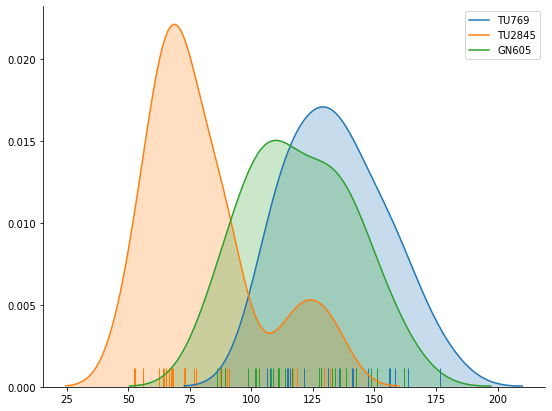

In [4]:
import pandas as pd
import seaborn as sns

data1 = pd.read_excel("/Users/LingxinW/Google Drive/Project/Keyence/MT_strains/IJ processed/20200324-234450_TU2769_Data.xlsx", 0, 0)
data2 = pd.read_excel("/Users/LingxinW/Google Drive/Project/Keyence/MT_strains/IJ processed/20200324-235049_TU2845_Data.xlsx", 0, 0)
data3 = pd.read_excel("/Users/LingxinW/Google Drive/Project/Keyence/MT_strains/IJ processed/20200324-235227_GN605_Data.xlsx", 0, 0)

df1 = pd.DataFrame({"TU2769":data1["Average cell body intensity"]})
df2 = pd.DataFrame({"TU2845":data2["Average cell body intensity"]})
df3 = pd.DataFrame({"GN605":data3["Average cell body intensity"]})

fig,ax=plt.subplots(figsize = (9,7))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

sns.distplot(df1,hist=False, rug=True, label = 'TU769', kde_kws={'shade': True})
sns.distplot(df2,hist=False, rug=True, label = 'TU2845', kde_kws={'shade': True})
sns.distplot(df3,hist=False, rug=True, label = 'GN605', kde_kws={'shade': True})